<a href="https://colab.research.google.com/github/SidharthBhakth/Time-Series-Forecasting-with-TF2.x/blob/master/3_LSTMs_in_TF2_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTMs in TF2.x

Forecasting a complex a time series of the form $ x(t) = \sin(\omega t^2) $ using LSTMs. We will also use autoregressive linear models and RNNs to compare the performance against LSTMs.

In [0]:
import numpy as np

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, SimpleRNN, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

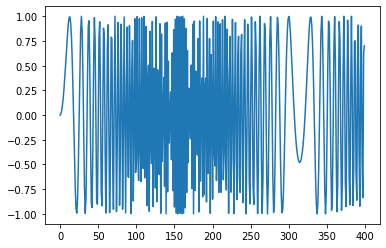

In [2]:
# Create data
series = np.sin((0.1*np.arange(400))**2)

plt.plot(series)
plt.show()

In [3]:
# Build dataset to use 10 lagged observations to predict the next observation

X, y = [], []

T = 10 # number of timesteps

for t in range(len(series)-T):
  X.append(series[t:t+T])
  y.append(series[t+T])

X = np.array(X).reshape(-1, T) # N x T x D dimensions
y = np.array(y)

X.reshape

# No of samples
N = len(X)

print(X.shape, y.shape)

(390, 10) (390,)


### **Simple Autoregressive linear model**

In [4]:
# Build
i = Input(shape=(T,))
x = Dense(1)(i)

model = Model(i, x)

# Compile
model.compile(loss='mse', optimizer=Adam(lr=0.01))

# Train
r = model.fit(X[:N//2], y[:N//2], validation_data=(X[N//2:], y[N//2:]), epochs=80, verbose=2)

Epoch 1/80
7/7 - 0s - loss: 1.7504 - val_loss: 0.7482
Epoch 2/80
7/7 - 0s - loss: 1.4904 - val_loss: 0.6871
Epoch 3/80
7/7 - 0s - loss: 1.2751 - val_loss: 0.6273
Epoch 4/80
7/7 - 0s - loss: 1.0897 - val_loss: 0.5824
Epoch 5/80
7/7 - 0s - loss: 0.9442 - val_loss: 0.5543
Epoch 6/80
7/7 - 0s - loss: 0.8331 - val_loss: 0.5354
Epoch 7/80
7/7 - 0s - loss: 0.7380 - val_loss: 0.5290
Epoch 8/80
7/7 - 0s - loss: 0.6635 - val_loss: 0.5245
Epoch 9/80
7/7 - 0s - loss: 0.6141 - val_loss: 0.5221
Epoch 10/80
7/7 - 0s - loss: 0.5806 - val_loss: 0.5260
Epoch 11/80
7/7 - 0s - loss: 0.5558 - val_loss: 0.5279
Epoch 12/80
7/7 - 0s - loss: 0.5378 - val_loss: 0.5342
Epoch 13/80
7/7 - 0s - loss: 0.5268 - val_loss: 0.5365
Epoch 14/80
7/7 - 0s - loss: 0.5169 - val_loss: 0.5406
Epoch 15/80
7/7 - 0s - loss: 0.5080 - val_loss: 0.5412
Epoch 16/80
7/7 - 0s - loss: 0.5028 - val_loss: 0.5383
Epoch 17/80
7/7 - 0s - loss: 0.4977 - val_loss: 0.5409
Epoch 18/80
7/7 - 0s - loss: 0.4938 - val_loss: 0.5480
Epoch 19/80
7/7 - 0

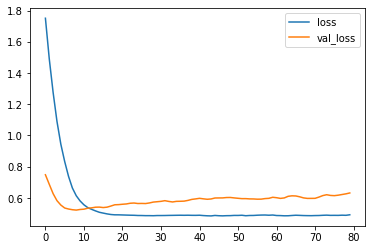

In [5]:
# Plot loss curve
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [0]:
# Forecast future predictions using self-predictions
y_test = y[N//2:]
y_pred = []

# first test input
x = X[N//2] # 1-D arrayof length T

while len(y_pred) < len(y_test):
  p = model.predict(x.reshape(1, -1))[0,0] # 1x1 array (scalar)

  # Update predictions
  y_pred.append(p)

  # Update input array with predicted value
  x = np.roll(x, -1)
  x[-1] = p

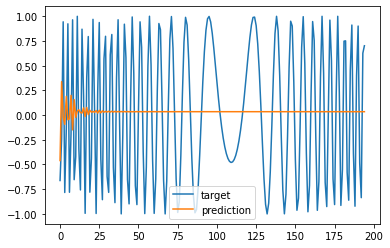

In [7]:
# Plot predicted vs actual output
plt.plot(y_test, label='target')
plt.plot(y_pred, label='prediction')
plt.legend()
plt.show()

### **RNN** 

In [0]:
# Reshape data
X = X.reshape(-1, T, 1) # N x T x D dimensions

In [9]:
# Build
i = Input(shape=(T,1))
x = SimpleRNN(10)(i)
x = Dense(1)(x)

model = Model(i, x)

# Compile
model.compile(loss='mse', optimizer=Adam(lr=0.05))

# Train
r = model.fit(X[:N//2], y[:N//2], validation_data=(X[N//2:], y[N//2:]), epochs=200, verbose=2)

Epoch 1/200
7/7 - 0s - loss: 0.6255 - val_loss: 0.8353
Epoch 2/200
7/7 - 0s - loss: 0.5484 - val_loss: 0.5604
Epoch 3/200
7/7 - 0s - loss: 0.4632 - val_loss: 0.5967
Epoch 4/200
7/7 - 0s - loss: 0.4405 - val_loss: 0.5507
Epoch 5/200
7/7 - 0s - loss: 0.4033 - val_loss: 0.5292
Epoch 6/200
7/7 - 0s - loss: 0.4095 - val_loss: 0.5481
Epoch 7/200
7/7 - 0s - loss: 0.3881 - val_loss: 0.4601
Epoch 8/200
7/7 - 0s - loss: 0.5032 - val_loss: 0.4338
Epoch 9/200
7/7 - 0s - loss: 0.3739 - val_loss: 0.4350
Epoch 10/200
7/7 - 0s - loss: 0.2852 - val_loss: 0.2367
Epoch 11/200
7/7 - 0s - loss: 0.2219 - val_loss: 0.2891
Epoch 12/200
7/7 - 0s - loss: 0.1846 - val_loss: 0.2262
Epoch 13/200
7/7 - 0s - loss: 0.1876 - val_loss: 0.1409
Epoch 14/200
7/7 - 0s - loss: 0.1487 - val_loss: 0.2684
Epoch 15/200
7/7 - 0s - loss: 0.1338 - val_loss: 0.1158
Epoch 16/200
7/7 - 0s - loss: 0.1117 - val_loss: 0.1463
Epoch 17/200
7/7 - 0s - loss: 0.0766 - val_loss: 0.0876
Epoch 18/200
7/7 - 0s - loss: 0.0680 - val_loss: 0.0860
E

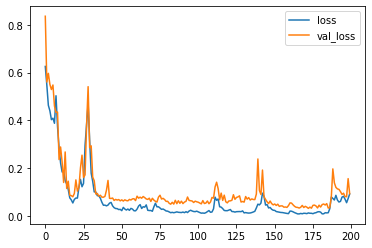

In [10]:
# Plot loss curve
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [0]:
# Forecast future predictions using self-predictions
y_test = y[N//2:]
y_pred = []

# first test input
x = X[N//2] # 1-D arrayof length T

while len(y_pred) < len(y_test):
  p = model.predict(x.reshape(1, -1, 1))[0,0] # 1x1 array (scalar)

  # Update predictions
  y_pred.append(p)

  # Update input array with predicted value
  x = np.roll(x, -1)
  x[-1] = p

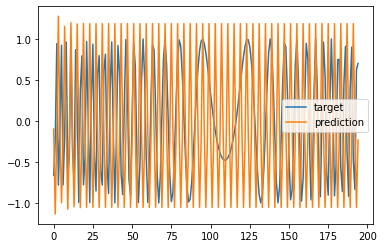

In [12]:
# Plot predicted vs actual output
plt.plot(y_test, label='target')
plt.plot(y_pred, label='prediction')
plt.legend()
plt.show()

### **LSTM**

In [13]:
# Build
i = Input(shape=(T,1))
x = LSTM(10)(i)
x = Dense(1)(x)

model = Model(i, x)

# Compile
model.compile(loss='mse', optimizer=Adam(lr=0.05))

# Train
r = model.fit(X[:N//2], y[:N//2], validation_data=(X[N//2:], y[N//2:]), epochs=200, verbose=2)

Epoch 1/200
7/7 - 0s - loss: 0.5198 - val_loss: 0.5585
Epoch 2/200
7/7 - 0s - loss: 0.4786 - val_loss: 0.6301
Epoch 3/200
7/7 - 0s - loss: 0.4216 - val_loss: 0.4848
Epoch 4/200
7/7 - 0s - loss: 0.3240 - val_loss: 0.4287
Epoch 5/200
7/7 - 0s - loss: 0.2399 - val_loss: 0.4226
Epoch 6/200
7/7 - 0s - loss: 0.2564 - val_loss: 0.3216
Epoch 7/200
7/7 - 0s - loss: 0.1609 - val_loss: 0.3472
Epoch 8/200
7/7 - 0s - loss: 0.1540 - val_loss: 0.4316
Epoch 9/200
7/7 - 0s - loss: 0.1551 - val_loss: 0.3211
Epoch 10/200
7/7 - 0s - loss: 0.0870 - val_loss: 0.2701
Epoch 11/200
7/7 - 0s - loss: 0.0577 - val_loss: 0.2815
Epoch 12/200
7/7 - 0s - loss: 0.0468 - val_loss: 0.2833
Epoch 13/200
7/7 - 0s - loss: 0.0521 - val_loss: 0.2543
Epoch 14/200
7/7 - 0s - loss: 0.0371 - val_loss: 0.2219
Epoch 15/200
7/7 - 0s - loss: 0.0423 - val_loss: 0.2205
Epoch 16/200
7/7 - 0s - loss: 0.0329 - val_loss: 0.2008
Epoch 17/200
7/7 - 0s - loss: 0.0199 - val_loss: 0.2309
Epoch 18/200
7/7 - 0s - loss: 0.0194 - val_loss: 0.2296
E

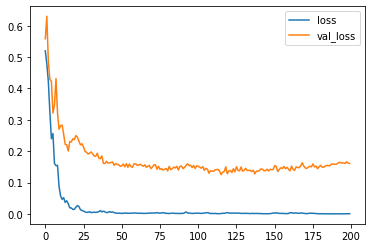

In [14]:
# Plot loss curve
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [0]:
# Forecast future predictions using self-predictions
y_test = y[N//2:]
y_pred = []

# first test input
x = X[N//2] # 1-D arrayof length T

while len(y_pred) < len(y_test):
  p = model.predict(x.reshape(1, -1, 1))[0,0] # 1x1 array (scalar)

  # Update predictions
  y_pred.append(p)

  # Update input array with predicted value
  x = np.roll(x, -1)
  x[-1] = p

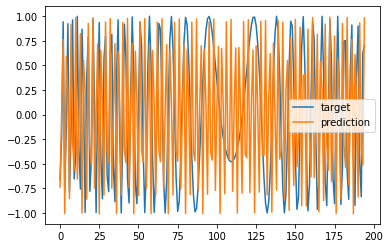

In [16]:
# Plot predicted vs actual output
plt.plot(y_test, label='target')
plt.plot(y_pred, label='prediction')
plt.legend()
plt.show()